In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

### Exploratory Data Analysis

**Se cargan los datos de parkinson dataset que contiene grabaciones de voz de 31 participantes, dentro de los cuales 23 presentan la enfermedad**


In [7]:
parkinson_vocal = pd.read_csv('/content/drive/MyDrive/datasets/parkinsons.data')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
parkinson_vocal.head(3)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634


In [9]:
parkinson_vocal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [10]:
parkinson_vocal.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


The target variable is status, in which 1 represents that the participant has parkinson and 0 that they don't

In [11]:
parkinson_vocal.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [12]:
parkinson_vocal.shape

(195, 24)

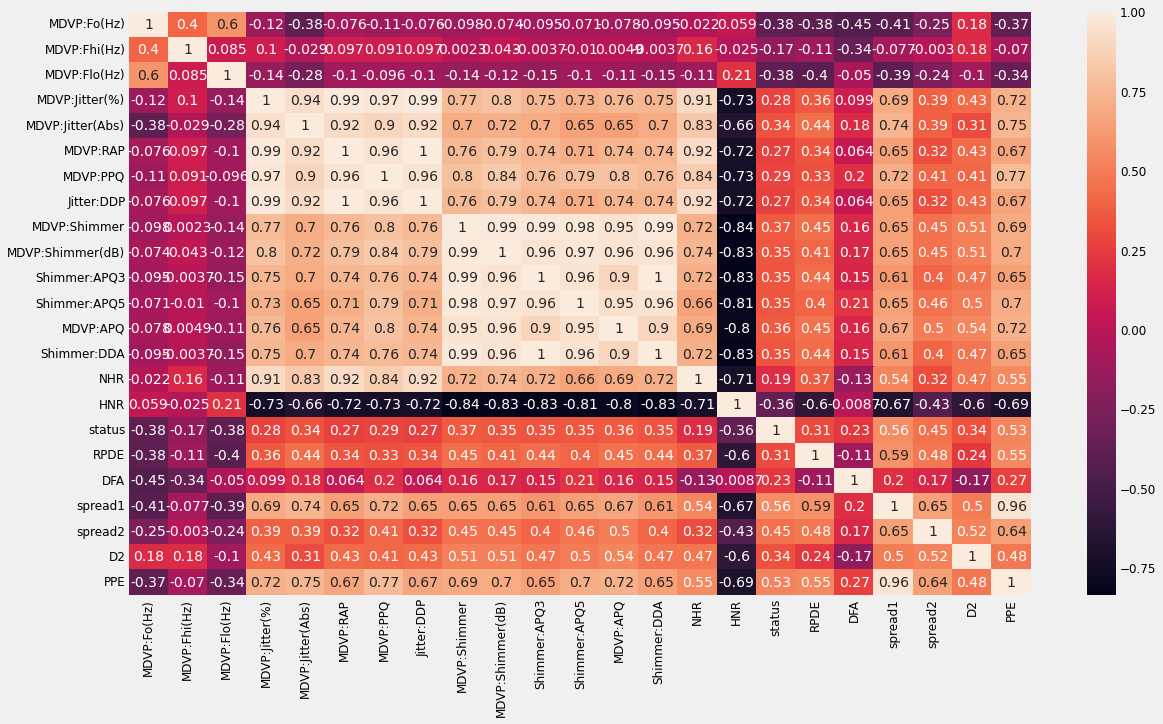

In [13]:
plt.figure(figsize=(18, 10))
sns.heatmap(parkinson_vocal.corr(), annot=True)

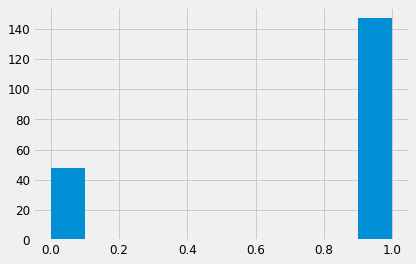

In [14]:
parkinson_vocal.status.hist()

Parece que hay problemas de colinealidad con algunas variables. Ya que tiene muy pocos atributos vamos a aplicar naive bayes para ignorar la clara colinealidad entre las variables.

### Naive bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

**Spliting the data**

In [16]:
parkinson_vocal.drop('name', axis=1, inplace=True)

In [17]:
parkinson_vocal.head(2) 

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [18]:
y = parkinson_vocal.status

In [19]:
X = parkinson_vocal[[col for col in parkinson_vocal.columns if col != 'status']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import LocalOutlierFactor

In [97]:
nb_pipeline = Pipeline([
    ('scale', RobustScaler()), 
    ('lo', LocalOutlierFactor(novelty=False))]).fit(X_train, X_test)
#nb_pipeline.fit(X_train, X_test)

In [98]:
nb_pipeline.fit(X_train, X_test)

Pipeline(memory=None,
         steps=[('scale',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('lo',
                 LocalOutlierFactor(algorithm='auto', contamination='auto',
                                    leaf_size=30, metric='minkowski',
                                    metric_params=None, n_jobs=None,
                                    n_neighbors=20, novelty=False, p=2))],
         verbose=False)

In [74]:
print(classification_report(y_test, nb_preds))

              precision    recall  f1-score   support

           0       0.30      0.75      0.43         8
           1       0.89      0.55      0.68        31

    accuracy                           0.59        39
   macro avg       0.60      0.65      0.55        39
weighted avg       0.77      0.59      0.63        39



### Scaling the data

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import LocalOutlierFactor

In [22]:
X_train_s = StandardScaler().fit_transform(X_train)

In [23]:
X_test_s = StandardScaler().fit_transform(X_test)

In [57]:
X_train_rs = RobustScaler().fit_transform(X_train)

In [58]:
X_test_rs = RobustScaler().fit_transform(X_test)

In [53]:
X_train_lo = LocalOutlierFactor().fit(X_train)

In [54]:
X_test_lo = LocalOutlierFactor().fit(X_test)

In [41]:
gnb = GaussianNB()

In [59]:
gnb.fit(X_train_rs, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [60]:
y_pred = gnb.predict(X_test_rs)

In [61]:
df = pd.DataFrame({'actual':y_test, 'predicted':y_pred})

In [45]:
df

,actual,predicted
72,1,0
104,1,0
11,1,1
148,1,1
184,0,1
136,1,1
147,1,1
18,1,1
118,1,0
107,1,0


In [62]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [63]:
metrics.confusion_matrix(y_test, y_pred) #Really bad performance

array([[ 6,  2],
       [14, 17]])

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.75      0.43         8
           1       0.89      0.55      0.68        31

    accuracy                           0.59        39
   macro avg       0.60      0.65      0.55        39
weighted avg       0.77      0.59      0.63        39



In [70]:
print(accuracy_score(nb_preds, y_test))

0.5897435897435898


In [33]:
parkinson_vocal.shape

(195, 23)

In [34]:
columns_ = list(X.columns)
columns_

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


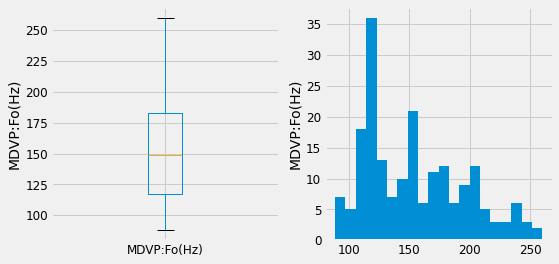

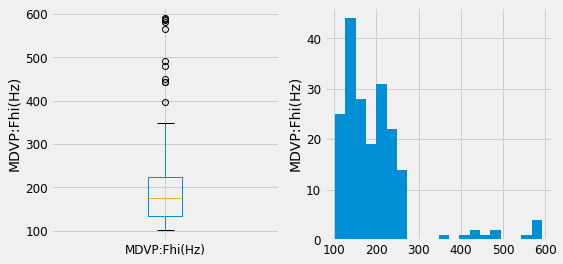

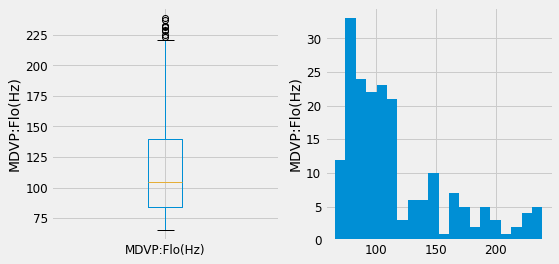

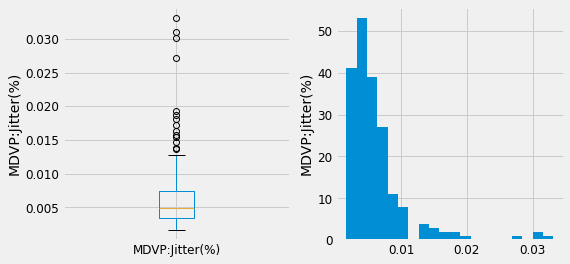

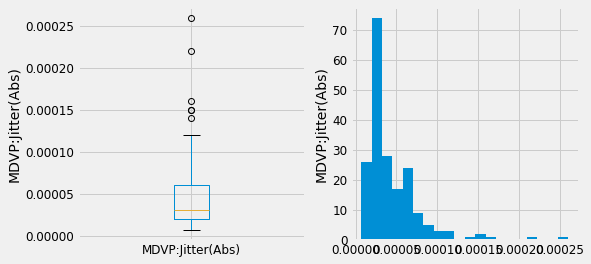

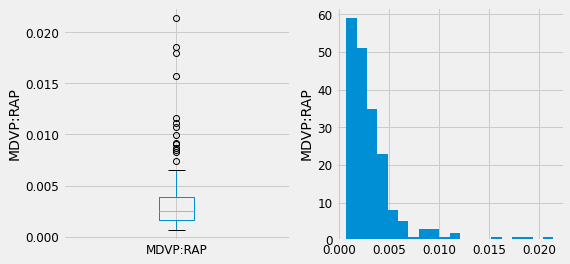

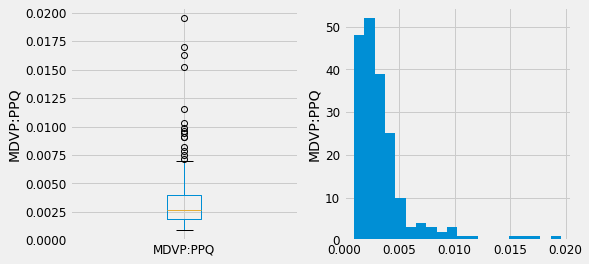

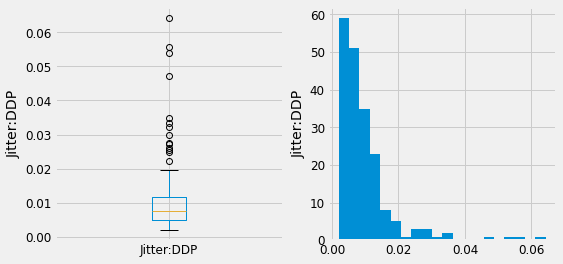

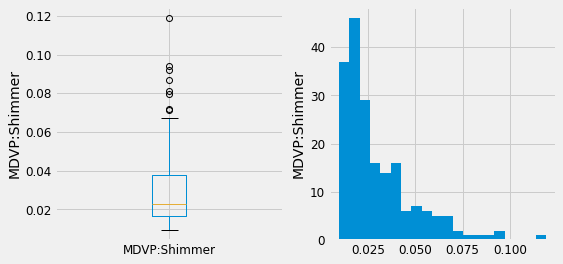

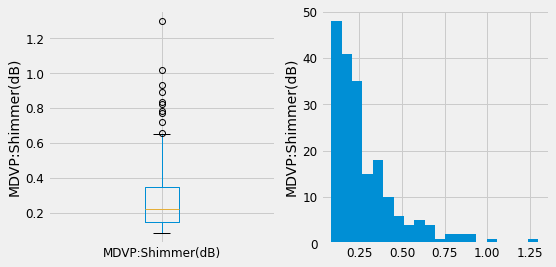

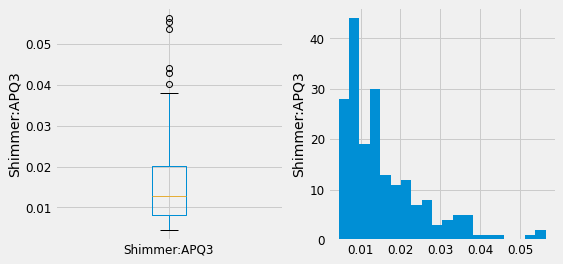

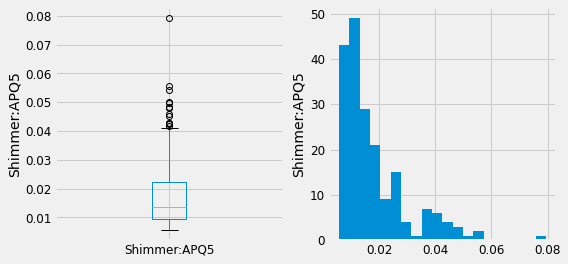

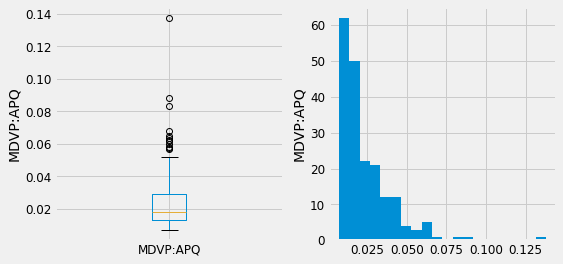

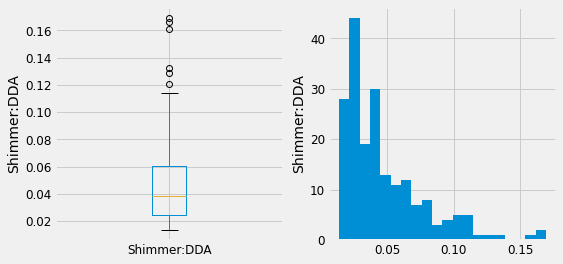

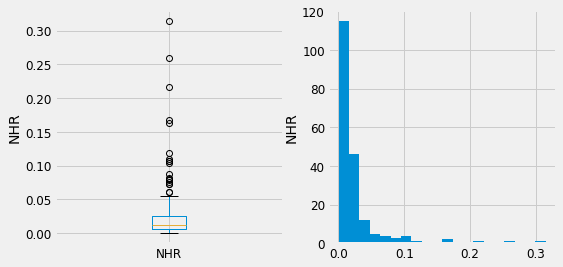

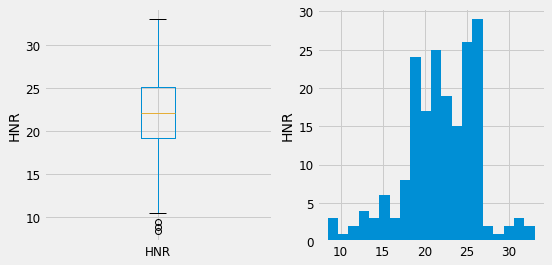

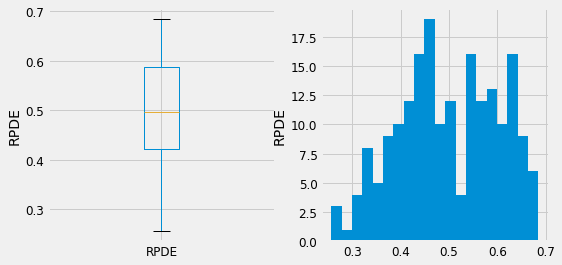

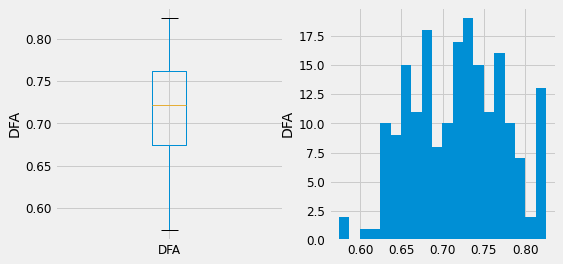

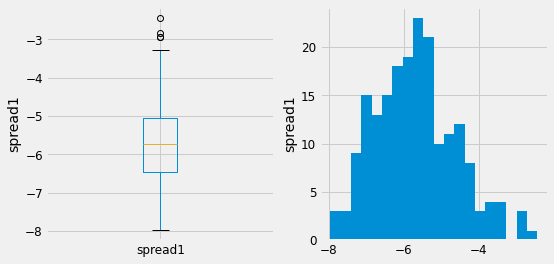

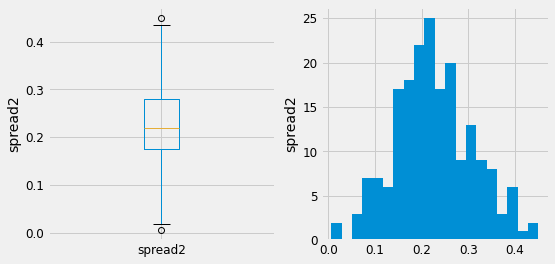

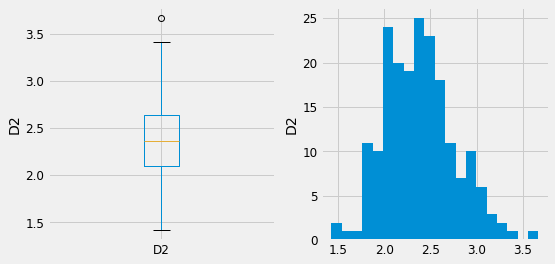

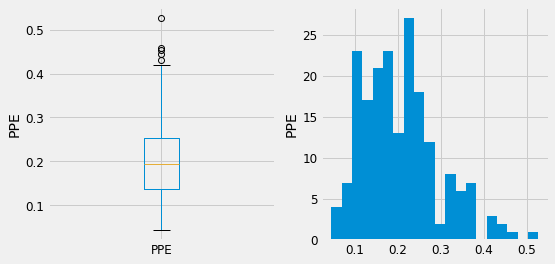

In [35]:
for col in columns_:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    fig = parkinson_vocal.boxplot(column=col)
    fig.set_ylabel(col)
    
    plt.subplot(1, 2, 2)
    fig = parkinson_vocal[col].hist(bins=20)
    fig.set_ylabel(col)
    

In [36]:
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

## ------------------------------------------------------------

In [ ]:
q1 = np.percentile(X['MDVP:Fhi(Hz)'], 25)
q3 = np.percentile(X['MDVP:Fhi(Hz)'], 75)

iqr = q3 - q1
upper = q3 + (iqr*3)
lower = q1 - (iqr*3)

### Outliers